# Plasmid heterozygosis: single-cell microfluidics data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import sys
import pathlib
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import scipy.stats as st
from scipy.stats import linregress
from IPython.display import HTML, display
import csv
import pandas as pd
from matplotlib import gridspec

from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')
#plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble']="\\usepackage{subdepth},\\usepackage{type1cm}"

print("> Python libraries imported")

> Python libraries imported


In [2]:
#sys.path.insert(0, '/Users/ESB/RPM_SYNC/RPM_Work/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/home/esb/Projects/uJ/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/Users/ESB/SYNC_RPM/RPM_Work/uJ_master/current/uJ_src/python/')
sys.path.insert(0, '/home/charly/Lab/Projects/uJ/local/current/uJ_src_pHT/python/')
sys.path.insert(0, '/home/esb/Projects/uJ/local/current/uJ_src_pHT/python/')

from AnalysisFunctions import *
from PlottingFunctions import *

> Analysis Functions loaded
Importing readroi
DataStructs...loaded!
DataManagers...loaded!
PlottingFunctions... loaded!


In [3]:
#workingDir='/home/charly/Lab/Projects/uJ/local/experiments/HT-LB/' #local
#workingDir='/home/esb/Projects/uJ/local/experiments/HT-LB/' #local
#os.chdir(workingDir)

In [4]:
pwd()

'/home/esb/Projects/uJ/local/experiments_ms/HT-LB'

In [5]:
expeLabel="HT-LB"
list_pos="xy02,xy03,xy04,xy05,xy06,xy10".split(",")  
list_pos="xy02,xy03,xy03-1,xy06,xy10".split(",")  


#rootDir="/home/charly/Lab/Projects/uJ/local/data_sample/HT13-LB/"
rootDir="../../data_sample/HT-LB/"

#toFile=False
toFile=True

#Parameters 

frame2min=5

notcaptured_start=866
notcaptured_end=866


frame_experiment_start=1;
frame_signal_start=int(865-(frame_experiment_start-1)/2)
frame_signal_end=int(865-(frame_experiment_start-1)/2)
frame_experiment_end=int(865-(frame_experiment_start-1)/2)


print("frame_experiment_start: ",frame_experiment_start)
print("frame_signal_start: ",frame_signal_start)
print("frame_signal_end: ",frame_signal_end)
print("frame_experiment_end: ",frame_experiment_end)



t_experiment_start=0
t_signal_start=(frame_signal_start-frame_experiment_start)*frame2min  
t_signal_end=(frame_signal_end-frame_experiment_start)*frame2min
t_experiment_end=(frame_experiment_end-frame_experiment_start)*frame2min

frames=range(int(frame_experiment_start),int(frame_experiment_end+1))

frames_list=[x for x in frames]
times=[(this_frame-frame_experiment_start)*frame2min for this_frame in frames]
times_hour=[(this_frame-frame_experiment_start)*frame2min/60 for this_frame in frames]


frames=range(int(frame_experiment_start),int(frame_experiment_end+1))

frames_list=[x for x in frames]
times=[(this_frame-frame_experiment_start)*frame2min for this_frame in frames]
times_hour=[(this_frame-frame_experiment_start)*frame2min/60 for this_frame in frames]
#print("\nMinutes:  %s"%times)
#print("\nHours:  [%s,%s]"%(times_hour[0],times_hour[-1]))


print("\nFrames:  %s\t %s->%s hours"%(frames,times_hour[0],times_hour[-1]))
print("\nFrame list:  %s"%(frames_list))
print("t_experiment_start=%s\t(%sh)"%(t_experiment_start, t_experiment_start/60))
print("t_signal_start=%s\t(%sh)"%(t_signal_start,t_signal_start/60))
print("t_signal_end=%s\t(%sh)"%(t_signal_end, t_signal_end/60))
print("t_experiment_end=%s\t(%sh)"%(t_experiment_end, t_experiment_end/60))


#Prepare file system
dataPath="%sdata/DsRed+GFP/"%rootDir

figurePath="%sfigures/"%rootDir
if not os.path.exists(figurePath) and toFile:
    os.mkdir(figurePath)

normDataPath="%sdata/normData/"%rootDir
if not os.path.exists(normDataPath) and toFile:
    os.mkdir(normDataPath)

# normDataNPath="%sdata/normDataN/"%rootDir
# if not os.path.exists(normDataNPath) and toFile:
#     os.mkdir(normDataNPath)

    
relIntensityPath="%sdata/relativeIntensity/"%rootDir
if not os.path.exists(relIntensityPath) and toFile:
    os.mkdir(relIntensityPath)

    
    
print("\n> Parameters loaded")

frame_experiment_start:  1
frame_signal_start:  865
frame_signal_end:  865
frame_experiment_end:  865

Frames:  range(1, 866)	 0.0->72.0 hours

Frame list:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 

In [6]:

data_pos=[]
data_frame=[]
data_GFP=[]
data_DsRed=[]
data_phi=[]
data_rho=[]

pop_df_list=[]
loaded_frames=0;
for root, dirs, files in os.walk(dataPath):
    dirs.sort()
    files.sort()
    #print("*",path)
    path = root.split(os.sep)
    if(not path[-1] in list_pos):
        continue
    print(path)
    trap_df_list=[]
    for file in files:
        
        extension=""
        if len(os.path.splitext(file))>0:
            extension=pathlib.Path(file).suffix
        filePath = os.path.join(root,file)
        #print(filePath)
        if extension == ".txt":
            fileframe=file.split('_')[-1].split('.')[0]
            
            if(int(fileframe)>frame_experiment_end):
                continue
            print("%s/%s"%(fileframe,len(files)), end='\r')
            #print("Loading data from: " + file)
            
            data=fromFileData(filePath)
            this_pos=[]
            this_frame=[]
            this_GFP=[]
            this_DsRed=[]
            this_imgGFP=[]
            this_imgDsRed=[]
            this_phi=[]
            this_rho=[]
            this_id=[]
            this_label=[]
            for roi in data:
                this_id.append(int(roi[1]))
                this_imgGFP.append(str(roi[2]))
                this_imgDsRed.append(str(roi[3]))
                this_pos.append(str(roi[4]))
                this_frame.append(int(roi[5]))
                this_label.append(str(roi[6]))
                gfp=float(roi[7])
                dsred=float(roi[8])
                this_GFP.append(gfp)
                this_DsRed.append(dsred)
                
                phi,rho=cart2pol(gfp,dsred)    
                
                this_phi.append(phi)
                this_rho.append(rho)
                
            data_pos.extend(this_pos)
            data_frame.extend(this_frame)
            data_GFP.extend(this_GFP)
            data_DsRed.extend(this_DsRed)
            data_phi.extend(this_phi)
            data_rho.extend(this_rho)
            loaded_frames+=1
    
        trap_pos_df=pd.DataFrame({"pos":this_pos,"frame":this_frame,"id":this_id,"imgGFP":this_imgGFP,"imgDsRed":this_imgDsRed,"label":this_label,"GFP":this_GFP,"DsRed":this_DsRed,"phi":this_phi,"rho":this_rho})        
        trap_df_list.append(trap_pos_df)
    print()
    trap_df=pd.concat(trap_df_list)
    pop_df_list.append(trap_df)

pop_df=pd.concat(pop_df_list)
            
data_frame=np.asarray(data_frame)
data_GFP=np.asarray(data_GFP)
data_DsRed=np.asarray(data_DsRed)
data_phi=np.asarray(data_phi)
data_rho=np.asarray(data_rho) 
data_pos=np.asarray(data_pos)

print("> Data loaded (%s cells from %s images)"%(len(data_GFP), loaded_frames))
pop_df.head()

['..', '..', 'data_sample', 'HT-LB', 'data', 'DsRed+GFP', 'xy02']
865/865
['..', '..', 'data_sample', 'HT-LB', 'data', 'DsRed+GFP', 'xy03']
865/865
['..', '..', 'data_sample', 'HT-LB', 'data', 'DsRed+GFP', 'xy03-1']
865/865
['..', '..', 'data_sample', 'HT-LB', 'data', 'DsRed+GFP', 'xy06']
865/865
['..', '..', 'data_sample', 'HT-LB', 'data', 'DsRed+GFP', 'xy10']
865/865
> Data loaded (253359 cells from 4325 images)


,pos,frame,id,imgGFP,imgDsRed,label,GFP,DsRed,phi,rho
0,xy02,1,0,HT-LB_xy02_GFP_001.tif,HT-LB_xy02_DsRed_001.tif,roi_f1_n0_x274_y474,142.446,141.475,0.781978,200.763638
1,xy02,1,1,HT-LB_xy02_GFP_001.tif,HT-LB_xy02_DsRed_001.tif,roi_f1_n1_x488_y470,180.117,175.080,0.771218,251.187460
2,xy02,1,2,HT-LB_xy02_GFP_001.tif,HT-LB_xy02_DsRed_001.tif,roi_f1_n2_x529_y468,158.876,153.351,0.767705,220.812392
3,xy02,1,3,HT-LB_xy02_GFP_001.tif,HT-LB_xy02_DsRed_001.tif,roi_f1_n3_x317_y466,138.770,177.320,0.906758,225.165484
4,xy02,1,4,HT-LB_xy02_GFP_001.tif,HT-LB_xy02_DsRed_001.tif,roi_f1_n4_x615_y462,151.972,168.694,0.837499,227.053197


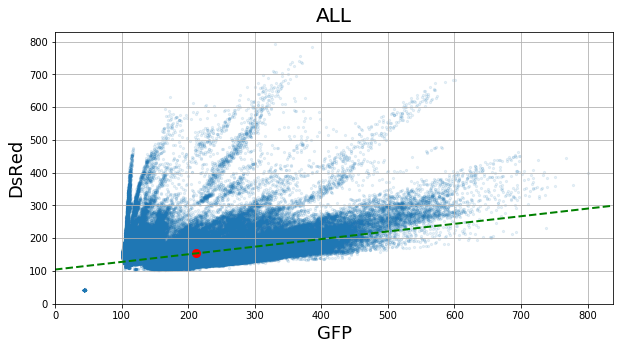

In [7]:
plt=plot_Raw_flourescence(pop_df["GFP"],pop_df["DsRed"],"ALL","GFP","DsRed",0,0)
#plt.yscale("log")
#plt.xscale("log")
plt.show()
plt.close()

# for trap in list_pos:
#     trap_df=pop_df[pop_df['pos']==trap].copy()
    
#     plt=plot_Raw_flourescence(trap_df["GFP"],trap_df["DsRed"],trap,"GFP","DsRed",0,0)
#     plt.show()
#     plt.close()


In [8]:
trapDF_list=[]
pop_df_presignal=pop_df[pop_df['frame']<frame_signal_start].copy()
meanGFPp=pop_df_presignal['GFP'].mean()
meanDsRedp=pop_df_presignal['DsRed'].mean()

gfp_max=pop_df['GFP'].max()
rfp_max=pop_df['DsRed'].max()

print("Normalizing flourescence by max per trap and calculating its polar coordinates ")
for trap in list_pos:
    trap_df=pop_df[pop_df['pos']==trap].copy()
    #gfp_max=trap_df['GFP'].max()
    #rfp_max=trap_df['DsRed'].max()
    print(trap, end=' ')
    #print(trap_df.head())
    gfpsN=trap_df["GFP"]/gfp_max
    rfpsN=trap_df["DsRed"]/rfp_max
    pos=trap_df['pos']
    ids=trap_df['id']
    frames=trap_df['frame']
    phis=[]
    rhos=[]
    relInt=[]
    absInt=[]
    for this_gfp,this_rfp in zip(gfpsN,rfpsN):
        this_phi,this_rho=cart2pol(this_gfp,this_rfp)
        phis.append(this_phi)
        rhos.append(this_rho)
        rgfp=this_gfp*gfp_max
        rrfp=this_rfp*rfp_max
        ri=((rgfp/meanGFPp)-(rrfp/meanDsRedp))
        relInt.append(ri)
        ai=np.sqrt((rgfp**2)+(rrfp**2))
        absInt.append(ai)


    trapDF=pd.DataFrame({"pos":pos,"frame":frames,"id":ids,"relInt":relInt,"absInt":absInt,"GFP_N":gfpsN,"DsRed_N":rfpsN,"phi_N":phis,"rho_N":rhos})
    
    trapDF_list.append(trapDF)
trapDF=pd.concat(trapDF_list)
pop_df_plus=pd.merge(pop_df,trapDF,on=['pos','frame','id'])
trapDF=[]
pop_df_plus.head()

Normalizing flourescence by max per trap and calculating its polar coordinates 
xy02 xy03 xy03-1 xy06 xy10 

,pos,frame,id,imgGFP,imgDsRed,label,GFP,DsRed,phi,rho,relInt,absInt,GFP_N,DsRed_N,phi_N,rho_N
0,xy02,1,0,HT-LB_xy02_GFP_001.tif,HT-LB_xy02_DsRed_001.tif,roi_f1_n0_x274_y474,142.446,141.475,0.781978,200.763638,-0.247684,200.763638,0.177986,0.178643,0.787239,0.252175
1,xy02,1,1,HT-LB_xy02_GFP_001.tif,HT-LB_xy02_DsRed_001.tif,roi_f1_n1_x488_y470,180.117,175.080,0.771218,251.187460,-0.288439,251.187460,0.225056,0.221076,0.776478,0.315476
2,xy02,1,2,HT-LB_xy02_GFP_001.tif,HT-LB_xy02_DsRed_001.tif,roi_f1_n2_x529_y468,158.876,153.351,0.767705,220.812392,-0.247394,220.812392,0.198515,0.193639,0.772963,0.277316
3,xy02,1,3,HT-LB_xy02_GFP_001.tif,HT-LB_xy02_DsRed_001.tif,roi_f1_n3_x317_y466,138.770,177.320,0.906758,225.165484,-0.497882,225.165484,0.173393,0.223905,0.911858,0.283193
4,xy02,1,4,HT-LB_xy02_GFP_001.tif,HT-LB_xy02_DsRed_001.tif,roi_f1_n4_x615_y462,151.972,168.694,0.837499,227.053197,-0.379614,227.053197,0.189889,0.213013,0.842728,0.285363


## This section discriminate data by their angle in polar coordinates 
#### Creates a histogram by trap/pos using the bins of the whole population distribution
#### Gives a data frame of data which angles have n element in a bin.


In [9]:

to_check_df_list=[]
n_lim=10  #use 10 for accurate rotation and normalization, 1 for exploring one trap



for angle_type in ["phi","phi_N"]:

    maxPhiT=pop_df_plus[angle_type].max()
    minPhiT=pop_df_plus[angle_type].min()
    phi_range=np.linspace(minPhiT,maxPhiT,100)



    for trap in list_pos:
        trap_df=pop_df_plus[pop_df_plus['pos']==trap].copy()
#        print(trap, end=" ")

        #### comment this conditional to analize all traps  #####   
    #     if(trap!=to_clean_trap):
    #         continue


        n,bins,patches=plt.hist(trap_df[angle_type],bins=phi_range)
        #plt.show()
        plt.close()

        lows=[]
        tmean=trap_df[angle_type].mean()
        for i,ni in enumerate(n):

            if(ni<=n_lim):
                lows.append(bins[i])
                #print("****",ni,bins[i])


        lefts=[x for x in lows if x<tmean]
        rights=[x for x in lows if x>tmean]
        lt=0
        rt=bins[-1]
        if(len(lefts)>0):
            lt=lefts[-1]
        if(len(rights)>0):
            rt=rights[0]
        #print("Trap %s thresholds: %s\t%s"%(trap,lt,rt))
        to_check_trap_df=trap_df[(trap_df[angle_type]<=lt)|(trap_df[angle_type]>=rt)].copy()
        to_check_df_list.append(to_check_trap_df)
#        print(to_check_trap_df["frame"].tolist())
        #print()

to_check_df=pd.concat(to_check_df_list)

to_check_df.describe()


,frame,id,GFP,DsRed,phi,rho,relInt,absInt,GFP_N,DsRed_N,phi_N,rho_N
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,197.633858,59.228346,137.145209,297.900622,1.125247,330.273472,-1.288907,330.273472,0.171363,0.376164,1.129161,0.416251
std,263.845228,47.454607,36.707153,89.733681,0.134176,88.693491,0.514788,88.693491,0.045866,0.113308,0.133731,0.111948
min,30.000000,0.000000,105.469000,131.809000,0.674910,206.436792,-2.541409,206.436792,0.131783,0.166437,0.680049,0.259058
25%,44.000000,8.000000,108.845000,225.353000,1.122098,251.984706,-1.724167,251.984706,0.136002,0.284557,1.126197,0.316592
50%,117.000000,56.500000,111.574000,275.009500,1.155680,296.134756,-1.269531,296.134756,0.139412,0.347259,1.159549,0.373394
75%,157.000000,111.000000,174.797000,391.893000,1.173698,432.152844,-0.949393,432.152844,0.218409,0.494849,1.177437,0.544738
max,864.000000,129.000000,253.718000,475.912000,1.330185,497.146999,-0.087331,497.146999,0.317020,0.600941,1.332609,0.626734


### Subtract the elements of the population data frame

In [10]:
to_check_df.index
pop_df_plus_purged=pop_df_plus.copy()
pop_df_plus_purged.drop(to_check_df.index,axis=0,inplace=True)


In [11]:
#pop_df_plus_purged[(pop_df_plus_purged['pos']=="xy19")&(pop_df_plus_purged['frame']==53)&(pop_df_plus_purged['id']>230)&(pop_df_plus_purged['id']<=235)]

## Center mean on $\pi$ and resize data to $[0,\pi]$

In [12]:

pop_df_plus_presignal=pop_df_plus[pop_df_plus['frame']<frame_signal_start].copy()
meanPhi=pop_df_plus_presignal['phi'].mean()
rot_theta=np.pi/2- meanPhi


maxPhi=pop_df_plus_purged['phi'].max()
minPhi=pop_df_plus_purged['phi'].min()


maxPhi_rot=maxPhi+rot_theta
minPhi_rot=minPhi+rot_theta
meanPhi_rot=meanPhi+rot_theta

meanRho=pop_df_plus_purged['rho'].mean()
maxRho=pop_df_plus_purged['rho'].max()



minPhi_N=pop_df_plus_purged["phi_N"].min()
maxPhi_N=pop_df_plus_purged["phi_N"].max()
#meanPhi_N=(maxPhi_N-minPhi_N)/2
meanPhi_N=pop_df_plus_presignal["phi_N"].mean()
rot_theta_N=np.pi/2- meanPhi_N
meanPhi_Nrot=meanPhi_N+rot_theta_N
minPhi_Nrot=minPhi_N+rot_theta_N
maxPhi_Nrot=maxPhi_N+rot_theta_N

print("All:    \t",minPhi_rot,maxPhi_rot,meanPhi_rot,rot_theta,minPhi,maxPhi)
print("All:    \t",minPhi_Nrot,maxPhi_Nrot,meanPhi_Nrot,rot_theta_N,minPhi_N,maxPhi_N)



trapDF_list=[]

for trap in list_pos:
    trap_df=pop_df_plus[pop_df_plus['pos']==trap].copy()
    pos=trap_df['pos']
    ids=trap_df['id']
    frames=trap_df['frame']
    print(trap,end=" ")
    
    phis_rot=trap_df['phi']+rot_theta
    rhos=trap_df['rho']
    
    phis01=[]
    
    for this_phi in phis_rot:

        if(this_phi<meanPhi_rot):
            phi01=((this_phi-minPhi_rot)/(meanPhi_rot-minPhi_rot))*np.pi/2
                  
           # phi01=0
        else:
            phi01=((this_phi-meanPhi_rot)/(maxPhi_rot-meanPhi_rot)+1)*np.pi/2
#         if(phi01==np.pi):
#             print("*",this_phi)
#         if(phi01==0):
#             print("*",this_phi)

        phis01.append(phi01)
    
    rhos01=rhos/maxRho
    maxRho99=rhos.mean()+4*rhos.std()
    rhos01=rhos/maxRho99 
    
    phis_Nrot=trap_df['phi_N']+rot_theta_N
    rhosN01=trap_df['rho_N']
    maxRhoN99=rhosN01.mean()+4*rhosN01.std()
    #rhosN01=rhosN01/np.max(rhosN01)
    rhosN01=rhosN01/maxRhoN99
    phisN01=[]

    for this_phi in phis_Nrot:

        if(this_phi<meanPhi_Nrot):
            phi01=((this_phi-minPhi_Nrot)/(meanPhi_Nrot-minPhi_Nrot))*np.pi/2
           # phi01=0
        else:
            phi01=((this_phi-meanPhi_Nrot)/(maxPhi_Nrot-meanPhi_Nrot)+1)*np.pi/2
#         if(phi01==np.pi):
#             print("**",this_phi)
#         if(phi01==0):
#             print("**",this_phi)

        phisN01.append(phi01)
    
    
    trapDF=pd.DataFrame({"pos":pos,"frame":frames,"id":ids,"phi_rot":phis_rot,"phi_01":phis01,"rho_01":rhos01,"phi_Nrot":phis_Nrot,"phi_N01":phisN01,"rho_N01":rhosN01})
    trapDF_list.append(trapDF)
print()
trapDF=pd.concat(trapDF_list)
pop_df_plus=pd.merge(pop_df_plus,trapDF,on=['pos','frame','id'])
trapDF=[]
pop_df_plus.describe()


All:    	 1.2216217851881677 2.2538601808264573 1.5707963267948966 0.9260726744135125 0.2955491107746553 1.3277875064129447
All:    	 1.219826300753676 2.2515660948885876 1.5707963267948966 0.921332487404354 0.29849381334932196 1.3302336074842336
xy02 xy03 xy03-1 xy06 xy10 


,frame,id,GFP,DsRed,phi,rho,relInt,absInt,GFP_N,DsRed_N,phi_N,rho_N,phi_rot,phi_01,rho_01,phi_Nrot,phi_N01,rho_N01
count,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000
mean,312.385820,45.976389,212.142257,153.921606,0.644743,266.344262,-0.000029,266.344262,0.265071,0.194359,0.649483,0.334035,1.570816,1.419259,0.468544,1.570816,1.421256,0.469081
std,232.756917,36.479475,80.207414,51.075042,0.177748,82.454910,0.401838,82.454910,0.100219,0.064493,0.177835,0.103259,0.177748,0.524584,0.140958,0.177835,0.524814,0.140874
min,1.000000,0.000000,42.637000,42.166000,0.295549,60.008377,-3.584376,60.008377,0.053275,0.053244,0.298494,0.075373,1.221622,0.000000,0.111555,1.219826,0.000000,0.111865
25%,113.000000,16.000000,166.584000,123.656000,0.533215,214.255249,-0.104328,214.255249,0.208146,0.156142,0.537833,0.268747,1.459288,1.069164,0.376204,1.459165,1.071182,0.377079
50%,266.000000,39.000000,199.793000,137.922000,0.580298,244.208888,0.089503,244.208888,0.249641,0.174156,0.585133,0.306207,1.506371,1.280971,0.438481,1.506465,1.282876,0.439011
75%,480.000000,68.000000,242.857000,164.858000,0.686673,291.506092,0.208150,291.506092,0.303449,0.208169,0.691837,0.365461,1.612746,1.667265,0.529049,1.613170,1.668568,0.529509
max,865.000000,199.000000,800.321000,791.944000,1.330185,908.241892,1.980847,908.241892,1.000000,1.000000,1.332609,1.141620,2.256258,3.147106,1.542944,2.253941,3.147073,1.546602


In [13]:
pop_df_plus_limits=pop_df_plus_purged.copy()
pop_df_plus_limits=pd.merge(pop_df_plus,pop_df_plus_purged)


## Calculate deviation over mean

In [14]:
pop_df_plus_presignal=pop_df_plus[pop_df_plus['frame']<frame_signal_start].copy()
meanPhi01=pop_df_plus_presignal['phi_01'].mean()
meanPhi_N01=pop_df_plus_presignal["phi_N01"].mean()

print(meanPhi,meanPhi_N)

phis=pop_df_plus['phi_01']
phis_N=pop_df_plus['phi_N01']
pos=pop_df_plus['pos']
ids=pop_df_plus['id']
framess=pop_df_plus['frame']


dev_mean=[]
dev_mean_N=[]

for this_phi,this_phiN in zip(phis,phis_N):

    this_dev=(this_phi-meanPhi01)/np.pi

    this_devN=(this_phiN-meanPhi_N01)/np.pi
    
    dev_mean.append(this_dev)
    dev_mean_N.append(this_devN)

tempDF=pd.DataFrame({"pos":pos,"frame":framess,"id":ids,"dev_mean":dev_mean,"dev_mean_N":dev_mean_N})
pop_df_plus=pd.merge(pop_df_plus,tempDF,on=['pos','frame','id'])



pop_df_plus.describe()

0.6447236523813841 0.6494638393905425


,frame,id,GFP,DsRed,phi,rho,relInt,absInt,GFP_N,DsRed_N,phi_N,rho_N,phi_rot,phi_01,rho_01,phi_Nrot,phi_N01,rho_N01,dev_mean,dev_mean_N
count,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000,253359.000000
mean,312.385820,45.976389,212.142257,153.921606,0.644743,266.344262,-0.000029,266.344262,0.265071,0.194359,0.649483,0.334035,1.570816,1.419259,0.468544,1.570816,1.421256,0.469081,0.000019,0.000019
std,232.756917,36.479475,80.207414,51.075042,0.177748,82.454910,0.401838,82.454910,0.100219,0.064493,0.177835,0.103259,0.177748,0.524584,0.140958,0.177835,0.524814,0.140874,0.166980,0.167054
min,1.000000,0.000000,42.637000,42.166000,0.295549,60.008377,-3.584376,60.008377,0.053275,0.053244,0.298494,0.075373,1.221622,0.000000,0.111555,1.219826,0.000000,0.111865,-0.451745,-0.452380
25%,113.000000,16.000000,166.584000,123.656000,0.533215,214.255249,-0.104328,214.255249,0.208146,0.156142,0.537833,0.268747,1.459288,1.069164,0.376204,1.459165,1.071182,0.377079,-0.111419,-0.111412
50%,266.000000,39.000000,199.793000,137.922000,0.580298,244.208888,0.089503,244.208888,0.249641,0.174156,0.585133,0.306207,1.506371,1.280971,0.438481,1.506465,1.282876,0.439011,-0.043999,-0.044028
75%,480.000000,68.000000,242.857000,164.858000,0.686673,291.506092,0.208150,291.506092,0.303449,0.208169,0.691837,0.365461,1.612746,1.667265,0.529049,1.613170,1.668568,0.529509,0.078962,0.078741
max,865.000000,199.000000,800.321000,791.944000,1.330185,908.241892,1.980847,908.241892,1.000000,1.000000,1.332609,1.141620,2.256258,3.147106,1.542944,2.253941,3.147073,1.546602,0.550010,0.549364


## Save RelF Data

In [ ]:
# export_list=[relIntensityPath,normDataPath,normDataNPath]
# relInt_list=["relInt","phi_01","phi_N01"]
# absInt_list=["absInt","rho_01","rho_N01"]
export_list=[normDataPath]
relInt_list=["phi_N01"]
absInt_list=["rho_N01"]


for pos in list_pos:
    df_pos=pop_df_plus[pop_df_plus['pos']==pos]
    for frame in frames_list:
        df_pos_frame=df_pos[df_pos["frame"]==frame]
        
        ids=df_pos_frame['id']
        imgsGFP=df_pos_frame['imgGFP']
        imgsDsRed=df_pos_frame['imgDsRed']
        this_pos=df_pos_frame['pos']
        this_frame=df_pos_frame['frame']
        this_label=df_pos_frame['label']
        this_GFP=df_pos_frame['GFP']
        this_DsRed=df_pos_frame['DsRed']
        
        framestr=str(frame).zfill(3)
        fileNamep="%s_%s_%s.txt"%(expeLabel,pos,framestr)
        
        for i in range(len(export_list)):
            exportPath=export_list[i]
            relInt_type=relInt_list[i]
            absInt_type=absInt_list[i]
            
            this_relInt=df_pos_frame[relInt_type]
            this_absInt=df_pos_frame[absInt_type]
            
            rows=zip(ids,imgsGFP,imgsDsRed,this_pos,this_frame,this_label,this_GFP,this_DsRed,this_relInt,this_absInt)
                 
            outPath=os.path.join(exportPath,pos)
            if not os.path.exists(outPath):
                os.mkdir(outPath)
            
            fileName=os.path.join(outPath,fileNamep)
            toFileData(fileName, rows)
            print(fileName)
        #print(x)

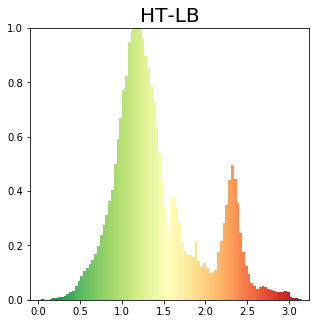

In [16]:
import matplotlib.patches as patches
def plot_distribution_color(ax,this_df,lrange,prop):
    cmap =cm.get_cmap('RdYlGn')   
    if prop=="phi_N01":
        cmap =cm.get_cmap('RdYlGn_r')   
    

    
    ax.set_xlim([lrange[0],lrange[-1]])
    ax.set_ylim([0,1])
    
    this_devs=this_df[prop]
    
    h,n=np.histogram(this_devs,lrange)
    maxh=np.max(h)
    h=[x/maxh for x in h]
    bin_size=n[1]-n[0]
    n=n[1:]-bin_size/2
   
    #print(len(h),len(n))
    
    for ib, b in enumerate(n):
        ax.add_patch(
            patches.Rectangle(
                (b-bin_size/2, 0),   # (x,y)
                bin_size,          # width
                h[ib],          # height
                facecolor=cmap((ib+1)/len(n))
            )
        )
    
    return ax




meanPhiN01=pop_df_plus_limits.phi_N01.mean()
maxPhiN01=pop_df_plus_limits.phi_N01.max()
minPhiN01=pop_df_plus_limits.phi_N01.min()


lrange=np.linspace(0-.1,np.pi+.1,101)




#plt=plot_phi_hist(pop_df_plus['phi_N01'],phi_range,expeLabel)
fig,ax=plt.subplots(figsize=(5,5))
prop='phi_N01'
ax=plot_distribution_color(ax,pop_df_plus,lrange,prop)
plt.title("%s"%(expeLabel))

plt.show()
plt.close()

In [17]:
frames2=np.linspace(frame_experiment_start,frame_experiment_end,5)
frames2=[int(x) for x in frames2]
frames2

[1, 217, 433, 649, 865]

DescribeResult(nobs=676, minmax=(0.015175444906032138, 2.880724311928887), mean=1.3782518347378836, variance=0.2559216548317251, skewness=0.4463615481523362, kurtosis=0.21465559163666503)
DescribeResult(nobs=389, minmax=(0.33984609771281826, 2.9886537589896207), mean=1.3857695956187013, variance=0.1990065945110654, skewness=0.9180063742041036, kurtosis=1.0365059679835893)
DescribeResult(nobs=260, minmax=(0.5658298585737195, 2.9694987935802524), mean=1.455987662197611, variance=0.290233622639943, skewness=0.8349701788207364, kurtosis=-0.2737517412390118)
DescribeResult(nobs=175, minmax=(0.43416525084716, 2.7165876427393862), mean=1.4482642432784119, variance=0.32442038939287043, skewness=0.5085088059333859, kurtosis=-0.9164822452266397)
DescribeResult(nobs=108, minmax=(0.5734904691696602, 2.7212248180246696), mean=1.5642724402200525, variance=0.27098590807485323, skewness=0.46542997569927974, kurtosis=-1.033349910133173)


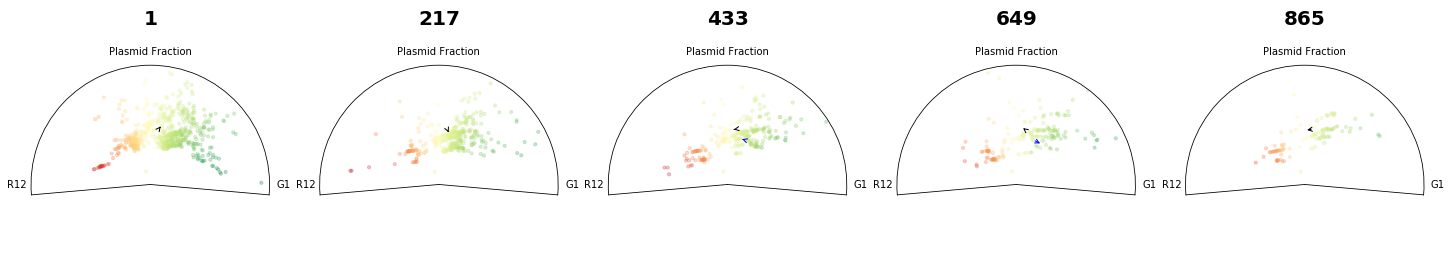

In [22]:

# outDir="%s2Dhist/"%figurePath
# if not os.path.exists(outDir):
#     os.mkdir(outDir)

def plot_polar_fancy(ax,this_df,ref_df,alph,llim,name,angle_type):
    
    if(angle_type=="phi_N01"):
        rho_type="rho_N01"
    elif(angle_type=="phi_01"):
        rho_type="rho_01"
    ##poopulation data
    phis01=this_df[angle_type]
    rhos01=this_df[rho_type]
    #  meanPhi_Nrot,maxRho_N,meanRho_N  
    colors=cmap([1-x/np.pi for x in phis01])
    ax.scatter(phis01, rhos01,s=10,c=colors,alpha=alph)
    
    this_moments=st.describe(phis01)
    print(this_moments)
    
    
    lphimean=np.mean(phis01)
    lrhomean=np.mean(rhos01)
    
    phisrmode=[round(p,1) for p in phis01]
    rhosrmode=[round(r,1) for r in rhos01]
    p=st.mode(phisrmode)
    r=st.mode(rhosrmode)
    lphimode=p.mode[0]
    lrhomode=r.mode[0]

    
    ####population metrics
    if(ref_df.empty):
    
        ax.scatter(lphimean,lrhomean,s=30,c='k',zorder=3)
        ax.scatter(lphimode,lrhomode,s=30,c='b',zorder=3)

    if(not ref_df.empty):
        phis01=list(ref_df[angle_type])
        rhos01=list(ref_df[rho_type])
        refphimean=np.mean(phis01)
        refrhomean=np.mean(rhos01)
        #ax.scatter(refphimean,refrhomean,s=30,c='k',zorder=3)
        
        ax.annotate("", xy=(lphimean, lrhomean), xytext=(refphimean,refrhomean),  arrowprops=dict(arrowstyle="->",color='k',lw=1))
        
        phisrmode=[round(p,1) for p in phis01]
        rhosrmode=[round(r,1) for r in rhos01]
        p=st.mode(phisrmode)
        r=st.mode(rhosrmode)
        refphimode=p.mode[0]
        refrhomode=r.mode[0]
        #ax.scatter(refphimode,refrhomode,s=30,c='b',zorder=3)
        
        ax.annotate("", xy=(lphimode, lrhomode), xytext=(refphimode,refrhomode),  arrowprops=dict(arrowstyle="->",color='b',lw=1))
        
        
        
    ax.set_rmax(1)
    ax.set_rticks(ticks=[])
    ax.set_thetamin(-llim)
    ax.set_thetamax(180+llim)
    ax.grid(False)
    ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"])
    #ax.set_title("%s"%(pop), va='bottom')
    ax.set_title(name, va='bottom',fontweight='bold')
    ax.title.set_position([.5, .9])
    return ax
    
fig= plt.figure( figsize=(5*len(frames2), 5))    

ref_df=pd.DataFrame()
ref_df=pop_df_plus[pop_df_plus['frame']<frame_signal_start]
alph=.25
llim=5
Ncolors=50
cmap = cm.get_cmap("RdYlGn", Ncolors)
angle_type="phi_N01"


for ti,t, in enumerate(frames2):
    name="%s"%t
    axist="1%s%s"%(len(frames2),ti+1)
    ax=fig.add_subplot(axist,projection='polar') 
    #filter_t=filterFrames(data_frame, [t])
    this_df=pop_df_plus[pop_df_plus['frame']==t]
    
    plot_polar_fancy(ax,this_df,ref_df,alph,llim,name,angle_type)

plt.show()
#print("Saved as %s%s_2Dhist_<pos>_<t>.tif"%(outDir, expeLabel))

[0.0, 0.3141592653589793, 0.6283185307179586, 0.9424777960769379, 1.2566370614359172, 1.5707963267948966, 1.8849555921538759, 2.199114857512855, 2.5132741228718345, 2.827433388230814, 3.141592653589793, 3.2986722862692828]


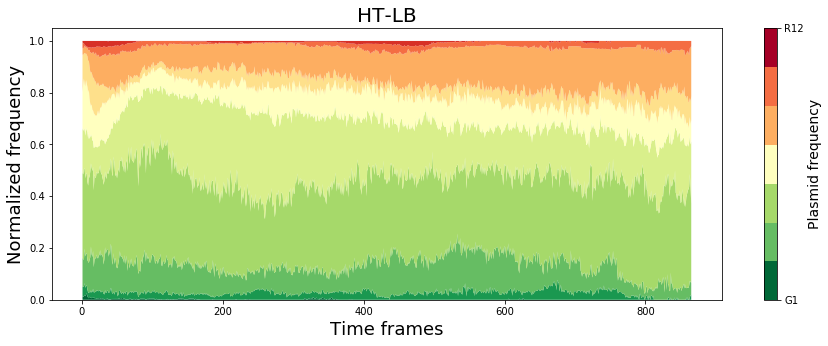

In [24]:
Ncolors=11
cmap = cm.get_cmap("RdYlGn", Ncolors)
cmap_r= cm.get_cmap("RdYlGn_r", Ncolors)


normed=True
bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.05]
binsf=[x*np.pi for x in bins]
print(binsf)

times=frames_list
time_freqs=[]
dcolor=[1-x for x in bins]

colorsl=cmap(dcolor)
for ti,t, in enumerate(times):

    this_df=pop_df_plus[pop_df_plus['frame']==t]
    this_data=this_df['phi_01']
    n,bins,patches=plt.hist(this_data,bins=binsf)#,density='true')
    plt.close()
    tots=sum(n)
    this_freqs=[x for x in n]
    if(normed):
        this_freqs=[x/tots for x in n]
    time_freqs.append(this_freqs)

#time_freqs
#print(time_freqs)
freqs_time=np.zeros((len(time_freqs[0]),len(time_freqs)))

for ti,tfs in enumerate(time_freqs):
    for fi,ft in enumerate(tfs):
        freqs_time[fi][ti]=ft
#print(freqs_time)


#fig= plt.figure( figsize=(10, 5))    
fig,ax=plt.subplots(figsize=(15, 5))
#sc=ax.scatter(binsf,binsf,color=colorsl)
cs = ax.contourf([binsf, bins],cmap=cmap_r)
ax.clear()
ax.stackplot(times,freqs_time,colors=colorsl)
plt.xlabel("Time frames")
plt.ylabel("Normalized frequency")
#plt.colorbar()



cb = plt.colorbar(cs, cmap=cmap)
bcticks=np.linspace(cs.get_array().min(), cs.get_array().max(), 2)
cb.set_ticks(bcticks)
#cb.set_ticklabels(np.linspace(0, round(np.pi,2), 2))
cb.set_ticklabels(["G1","R12"])
cb.set_label('Plasmid frequency',fontsize=14)
#plt.colorbar(sc,ax=ax,ticks=binsf,label="x")
#plt.clim(0, np.pi)
plt.title(expeLabel)

plt.show()

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')